<a href="https://colab.research.google.com/github/KacperKurzydlo/UdzialBadaniaNaukowe/blob/main/Udzia%C5%82BadaniaNaukowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

In [ ]:
nx, ny = 102, 102
u = np.zeros((ny, nx))

# Warunki brzegowe
u[:, -1] = 40     # Prawo
u[:, 0] = 30      # Lewo
u[0, :] = 10      # Dół
u[-1, :] = 60     # Góra


tolerance = 1e-5
error = 1
while error > tolerance:
    u_new = u.copy()
    u_new[1:-1, 1:-1] = 0.25 * (u[1:-1, :-2] + u[1:-1, 2:] + u[:-2, 1:-1] + u[2:, 1:-1])
    error = np.max(np.abs(u - u_new))
    u = u_new


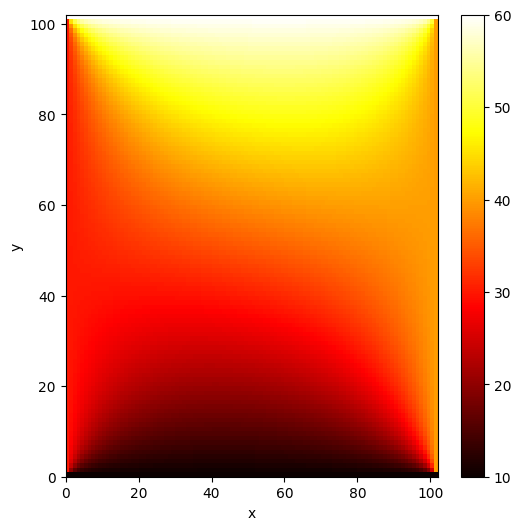

In [26]:
plt.figure(figsize=(6, 6))
plt.pcolormesh(u, cmap='hot')
#plt.imshow(u, cmap='hot', interpolation='nearest', origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

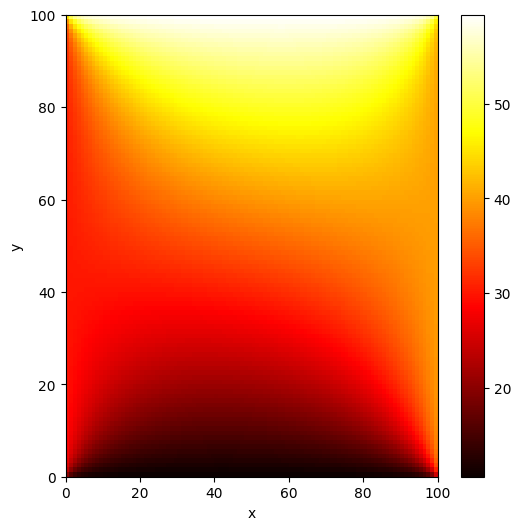

In [ ]:
plt.figure(figsize=(6, 6))
plt.pcolormesh(u[1:-1,1:-1], cmap='hot')
#plt.imshow(u, cmap='hot', interpolation='nearest', origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()